# 3D and 2D scatter and Delaunay Triangulated Surface demos

In [1]:
# 3D_Scatter_n_TriSurf.ipynb
# 3D and 2D scatter and Delaunay Triangulated Surface demos
# 2020.12.20
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:93% !important; }</style>"))

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np

import matplotlib
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib notebook  

# Generate Data

In [3]:
def gen_data(N=100,kind='rand.uniform',Interval=[-1000,1000]):
    [vmin,vmax] = Interval
    if kind=='rand.uniform':
        x = np.random.uniform(vmin,vmax,N)
        y = np.random.uniform(vmin,vmax,N)
    elif kind=='linspace':
        x = np.linspace(vmin,vmax,N)
        y = np.linspace(vmin,vmax,N)

    return x,y

In [4]:
N=10000
d = pd.DataFrame({ 'x': np.random.normal(1, 2, N),
                   'y': np.random.normal(1, 2, N)} )
# d.head()

In [5]:
# print(np.mean(d.x),np.std(d.x)) #0.9517255290237757 1.9895491127870666
# print(np.mean(d.y),np.std(d.y)) #1.0296579557794694 2.010216203348524

In [6]:
# import random
# xg = [random.gauss(1,2) for _ in range(N)]
# yg = [random.gauss(1,2) for _ in range(N)]
# print(np.mean(xg),np.std(xg))   # 0.9747709494434992 1.9999531974175269
# print(np.mean(yg),np.std(yg))   # 0.9937480497523038 1.987679652468787

In [7]:
N=100
x,y = gen_data(N=N,kind='rand.uniform',Interval=[-1000,1000])
z = np.sqrt(x**2+y**2)
d = pd.DataFrame({ 'x': x,
                   'y': y,
                   'z': z} )
d.head()

,x,y,z
0,738.339765,615.273447,961.096781
1,-384.715500,-448.435076,590.846877
2,-153.248866,313.971030,349.375189
3,-971.591366,-749.110952,1226.848402
4,-813.994152,-884.150433,1201.793854


<IPython.core.display.Javascript object>


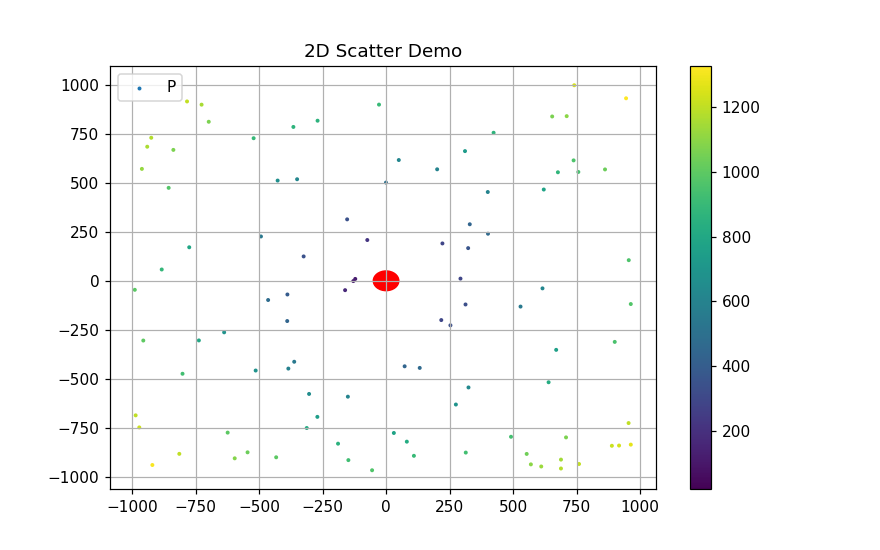

In [8]:
import matplotlib.pyplot as plt
def scatter_2D(d,TITLE='2D Scatter Demo', x='x',y='y',col='z',savepng=False,out_fn='foo.png'):
    fig, ax= plt.subplots(figsize=(8,5))

    sc=ax.scatter(  d[x],  d[y],  c=d[col], s=10,  marker=".",  label = 'P')   
    ax.set_title(TITLE)
    ax.legend()
    ax.grid(True)    
    
    circle = plt.Circle((0,0), 50, color='r')
    ax.add_artist(circle)

    fig.colorbar(sc)
    if savepng:
        plt.savefig(out_fn, bbox_inches='tight' )
    plt.show()
    
scatter_2D(d=d,TITLE='2D Scatter Demo', x='x',y='y',col='z',savepng=False,out_fn='foo.png')    


<IPython.core.display.Javascript object>


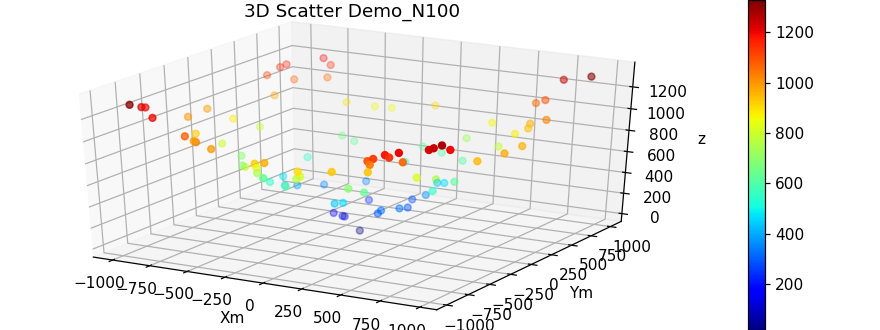

In [9]:
%matplotlib notebook  
import matplotlib
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D

def scatter3d_v2(d, col, TITLE, colorsMap='jet'):
    x = np.array(d.x).flatten()
    y = np.array(d.y)
    z = np.array(d[col])
    cs = z
    
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=np.min(cs), vmax=np.max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure(figsize=(8,3))

    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    ax.set_xlabel('Xm')
    ax.set_ylabel('Ym')
    ax.set_zlabel(col)
    ax.set_title(TITLE)

    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()

Nsample=N    
scatter3d_v2(d=d.sample(n=Nsample), col='z', TITLE='3D Scatter Demo'+f'_N{Nsample}', colorsMap='jet')    

<IPython.core.display.Javascript object>


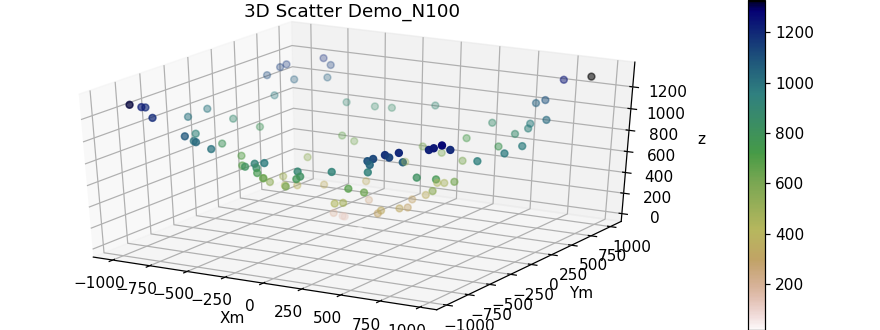

In [10]:
scatter3d_v2(d=d.sample(n=Nsample), col='z', TITLE='3D Scatter Demo'+f'_N{Nsample}', colorsMap=plt.cm.gist_earth_r)    

# SURFACE VIA TRIANGULATION

https://stackoverflow.com/questions/22653956/using-scipy-spatial-delaunay-in-place-of-matplotlib-tri-triangulations-built-in

In [11]:
import numpy as np
import scipy.spatial
import matplotlib
import math

import matplotlib.tri as mtri
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


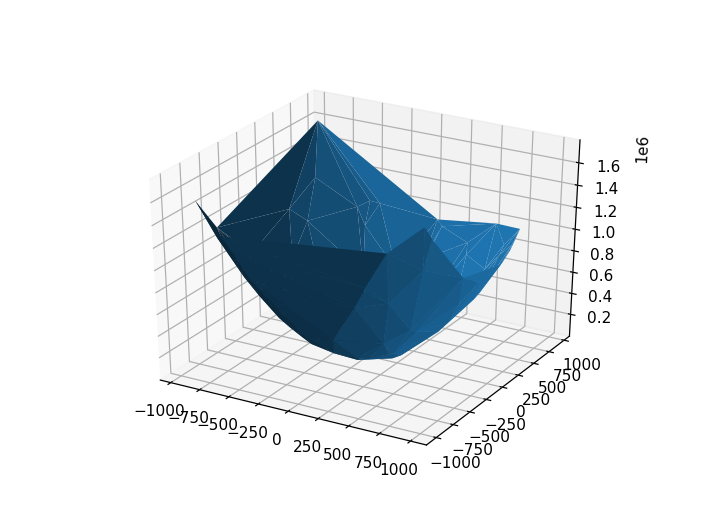

In [12]:
x,y = gen_data(N=100,kind='rand.uniform',Interval=[-1000,1000])

# Create the Delaunay tessalation using scipy.spatial
pts = np.vstack([x, y]).T
tess = scipy.spatial.Delaunay(pts)

# Create the matplotlib Triangulation object
x = tess.points[:, 0]
y = tess.points[:, 1]
tri = tess.vertices # or tess.simplices depending on scipy version
triang = mtri.Triangulation(x=pts[:, 0], y=pts[:, 1], triangles=tri)

# Plotting
z = x*x + y*y
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(triang, z)
plt.show()

# Do the same with Noisy Data

In [13]:
print(np.mean(z), np.std(z), np.std(z)/np.mean(z))

# make noisy data with std = 10% of mean(z)
noise = np.random.normal(0, np.mean(z)*.1, N)

666050.6496198707 420829.1892196556 0.6318276086958728


<IPython.core.display.Javascript object>


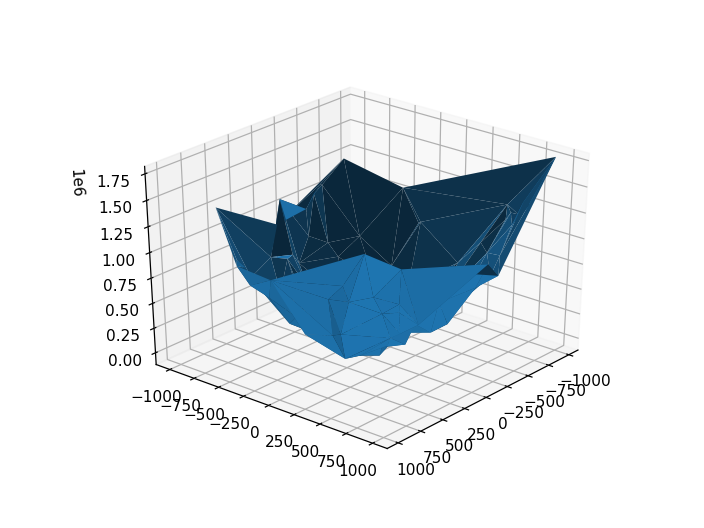

In [14]:
x,y = gen_data(N=100,kind='rand.uniform',Interval=[-1000,1000])

# Create the Delaunay tessalation using scipy.spatial
pts = np.vstack([x, y]).T
tess = scipy.spatial.Delaunay(pts)

# Create the matplotlib Triangulation object
x = tess.points[:, 0]
y = tess.points[:, 1]
tri = tess.vertices # or tess.simplices depending on scipy version
triang = mtri.Triangulation(x=pts[:, 0], y=pts[:, 1], triangles=tri)

# Plotting
z = x*x + y*y + noise
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(triang, z)
plt.show()